In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


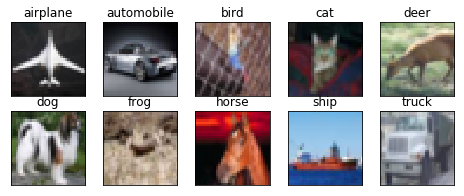

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # Size32*32   RF 3*3
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) # Size30*30   RF 5*5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))# Size15*15   RF 10*10
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) # Size15*15  RF 12*12
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) # Size13*13  RF 14*14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Size6*6  RF 28*28
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) # Size6*6  RF 30*30
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) # Size4*4  RF 32*32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Size2*2  RF 64*64 # Input image is 32*32
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0827 03:49:11.771695 140117766735744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0827 03:49:11.813171 140117766735744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 03:49:11.826424 140117766735744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0827 03:49:56.062288 140117766735744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 28s 71ms/step - loss: 1.8455 - acc: 0.2964 - val_loss: 1.4258 - val_acc: 0.4692
Epoch 2/100
390/390 [==============================] - 21s 54ms/step - loss: 1.3287 - acc: 0.5186 - val_loss: 1.1409 - val_acc: 0.5879
Epoch 3/100
390/390 [==============================] - 20s 53ms/step - loss: 1.1165 - acc: 0.6085 - val_loss: 1.0112 - val_acc: 0.6300
Epoch 4/100
390/390 [==============================] - 21s 53ms/step - loss: 0.9754 - acc: 0.6599 - val_loss: 0.8685 - val_acc: 0.6965
Epoch 5/100
390/390 [==============================] - 21s 54ms/step - loss: 0.8759 - acc: 0.6978 - val_loss: 0.7698 - val_acc: 0.7413
Epoch 6/100
390/390 [==============================] - 21s 54ms/step - loss: 0.8015 - acc: 0.7253 - val_loss: 0.7540 - val_acc: 0.7427
Epoch 7/100
390/390 [==============================] - 21s 53ms/step - loss: 0.7475 - acc: 0.7449 - val_loss: 0.7249 - val_acc: 0.7573
Epoch 8/100
390/390 [==============================] - 

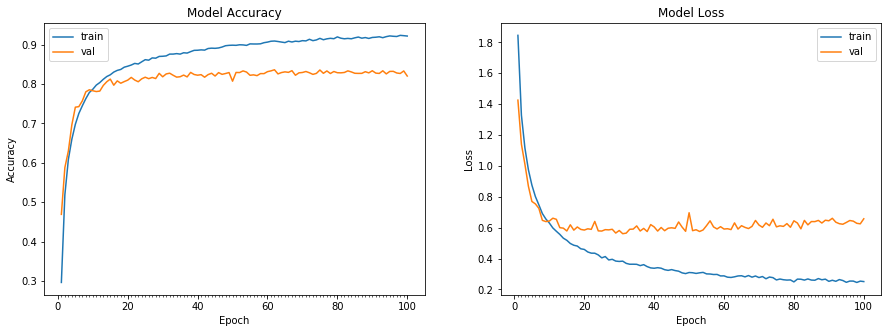

Accuracy on test data is: 82.04


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Design Approach
The base accuracy of above model was 82.04%

> Observations :

>> Validation accuracy did not increase too much (plateaus)after 20 epochs

>> Validation loss dropped the most till 20 epochs and then increased gradually

> Model Observations :

>> Input image in 32*32

>> But but the time convolutions are done - we are at 64*64 please see the comments
> 
>> Dropouts close to prediction is 50% - which is too high (might drop out required features)


Please refer to observations and learning after the code

In [11]:
print(num_train, img_channels, img_rows, img_cols)
print(num_classes)

50000 32 32 3
10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_34 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_50 (Activation)   (None, 30, 30, 48)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 77s 199ms/step - loss: 1.4762 - acc: 0.4623 - val_loss: 2.2705 - val_acc: 0.3849
Epoch 2/100
390/390 [==============================] - 74s 190ms/step - loss: 1.0641 - acc: 0.6214 - val_loss: 1.0956 - val_acc: 0.6247
Epoch 3/100
390/390 [==============================] - 74s 190ms/step - loss: 0.8943 - acc: 0.6810 - val_loss: 0.8538 - val_acc: 0.7001
Epoch 4/100
390/390 [==============================] - 74s 190ms/step - loss: 0.7965 - acc: 0.7184 - val_loss: 0.8745 - val_acc: 0.6994
Epoch 5/100
390/390 [==============================] - 74s 190ms/step - loss: 0.7227 - acc: 0.7494 - val_loss: 0.7718 - val_acc: 0.7305
Epoch 6/100
390/390 [==============================] - 74s 191ms/step - loss: 0.6679 - acc: 0.7652 - val_loss: 0.7902 - val_acc: 0.7252
Epoch 7/100
390/390 [==============================] - 74s 190ms/step - loss: 0.6229 - acc: 0.7800 - val_loss: 0.7231 - val_acc: 0.7500
Epoch 8/100
390/390 [===========================

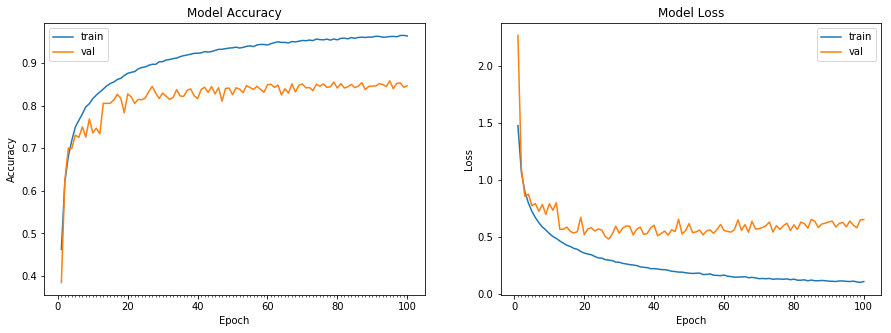

Accuracy on test data is: 84.65


In [15]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #Size 32 RF 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(48, 3, 3, input_shape=(32, 32, 3)))  #Size 30 RF 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(48, 3, 3)) #Size 28 RF 7*7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3,border_mode='same')) #Size 28 RF 9*9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3)) #Size 26 RF 11*11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(192, 3, 3)) #Size 24 RF 13*13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))



model.add(MaxPooling2D(pool_size=(2, 2))) #Size 12 RF 26*26
model.add(Convolution2D(48, 1, activation='relu')) #Size 12 RF 26*26


model.add(Convolution2D(48, 3, 3)) #Size 10 RF 28*28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(96, 3, 3)) #Size 8 RF 30*30
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(192, 3, 3)) #Size 6 RF 32*32
model.add(Activation('relu'))

model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))



# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
def l2_custom_loss(y_true, y_pred):
  
  
  
  
  #bin_entropy_loss = K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)
  bin_entropy_loss = K.mean(K.categorical_crossentropy(y_true, y_pred), axis=-1)
  
  # Get list of weights
  
  w = []
  for layer in model.layers:
    for weight in layer.get_weights():
      w.append(weight.flatten())
  
  w_list = np.concatenate(w).ravel().tolist()
  w_array = np.asarray(w_list)
  
  l2_reg_loss = lamda/(2*train_features.shape[0]) * K.sum(K.square(K.abs(w_array)))
  
  loss = bin_entropy_loss
  
  
  return loss

lamda = 0.1
model.compile(loss=l2_custom_loss,
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


## Observations and Learning

* First model no dropout; BN. 20 epochs
> Started to overfit after 5 epochs. Validation accuracy was at .73
* Added BN and Dropout(0.1)
> The validation accuracy increased to 0.79 , but was not smooth.
> The validation accuracy was in upward trend - so definetely potential to improve.
> Increased batch size to 256  
* The RF was at 24*24 last convolution layer. So potentially not learning from full image.
* One solution is to add more layers, but the size of the image in last layer will drop less than 6*6 - which will impact prediction. Increase RF from 24 to 32 will need 4 more layers. This will impact image size
* Using Border mode
> Added 2 layers with border_mode = same . This increased the RF to 32*32 without reducing the image size. Potentially adding a bit of noise. But, this might have an effect of regularization and help with overfitting.Not adding dropout after using border_mode = 'same' as might have a duplicate effect.600K parameters .Validation accuracy was .8106

* Realized adding Border mode = 'same' will actually add more than 10% of dummy pixels. Hence a dropout of 0.1 may not be enough. Increased the dropout to 0.25 after adding border_mode = 'same'. Also added the **custom L2 regularization**. Redcued the batch size to 128 .Validation accuruacy was 0.7975 after 20 epcohs

* Enabled **horizontal flip** to True. This is a form of data augmentation ( A cat looking right and a cat looking left is still a cat ) .After 20 epochs was close to .8220. Hence adding the horizonatal flip defintely helped. 

### * Rerun with epochs = 100. **Validation accuracy of 84.65%**. Submitted.